# A demo of the spectral method for structured models

In this demo, we are going to apply the Wigner rank-one denoising problem to a structured model. To do so, we will simply download the Fashion-MNIST data set and use a very simple (some would say trivial) model for its structure by simply measuring the covariance matrix $\Sigma$ between images. As we shall see, this is enough to improve on the spectral method.

First, we download the Fashion-MNIST dataset:

60000 train set
10000 test set


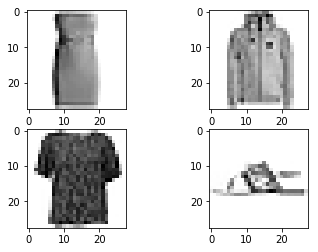

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

plt.subplot(221)
img_index = 51432
plt.imshow(x_train[img_index],cmap='Greys')

plt.subplot(222)
img_index = 567
plt.imshow(x_train[img_index],cmap='Greys')

plt.subplot(223)
img_index = 26579
plt.imshow(x_train[img_index],cmap='Greys')

plt.subplot(224)
img_index = 8765
plt.imshow(x_train[img_index],cmap='Greys')

All right, let us build our data set for the rank-one problem. We center the data, normalize them, and compute the empirical correlation $\Sigma$.

In [2]:
data=x_train.reshape(60000,784)-np.sum(x_train.reshape(60000,784),1).reshape(60000,1)/784
data=tf.keras.utils.normalize(data, axis=-1,order=2)*np.sqrt(784)
SIGMA=data.T@data/60000;

data_test=x_test.reshape(10000,784)-np.sum(x_test.reshape(10000,784),1).reshape(10000,1)/784
data_test=tf.keras.utils.normalize(data_test, axis=-1,order=2)*np.sqrt(784)

All right, now, let us pick a given unseen image from the test set and do the rank one stuff:

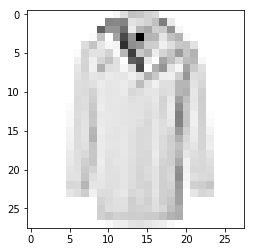

In [3]:
x=data_test[2209].reshape(784,1)
#x=data_test[6209].reshape(784,1)
plt.imshow(x.reshape(28,28),cmap='Greys')

In [4]:
N = 784
#create noise, and the random matrix observation:
b = np.random.randn(N,N)
W = np.tril(b) + np.tril(b, -1).T
DELTA=10
Y = x@x.T/(N) + np.sqrt(DELTA)*W/np.sqrt(N)

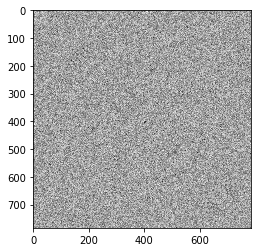

In [9]:
plt.imshow(Y,cmap='Greys')

First, we try to apply the standard PCA approach:

(-0.5, 27.5, 27.5, -0.5)

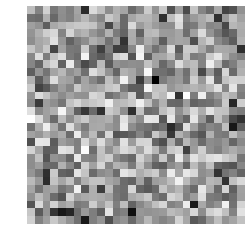

In [5]:
from scipy.sparse.linalg import eigsh,eigs
# Method one: naive PCA
val, vec = eigsh(Y, k=1,which='LA')
plt.imshow(vec.reshape(28,28),cmap='Greys')
plt.axis("off")

And our improved spectral approach, that uses the information from the covariance $\Sigma$:

(-0.5, 27.5, 27.5, -0.5)

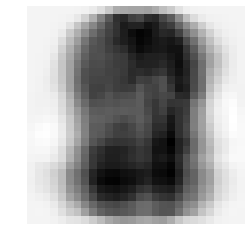

In [6]:
# Method two: linearized AMP: LAMP
val, vec = eigs(SIGMA@(Y-np.eye(784,784)), k=1,which='LR')
plt.imshow((vec.real).reshape(28,28),cmap='Greys')
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

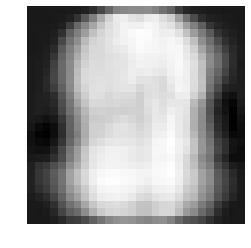

In [7]:
plt.imshow((-vec.real).reshape(28,28),cmap='Greys')
plt.axis("off")

The difference is really strinking! We can actually plot the mean-square error that the two methods yield as a function of $\Delta$:

DELTA=0


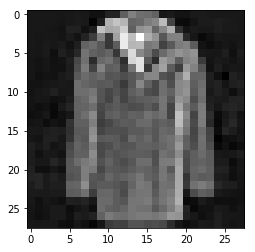

0.05   0.048951675694757744   0.032532289786474135
DELTA=0.05


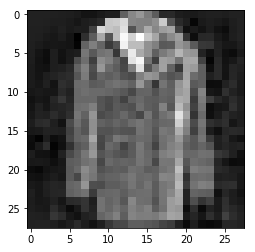

0.1   0.10858731975993657   0.06322375271124402
DELTA=0.1


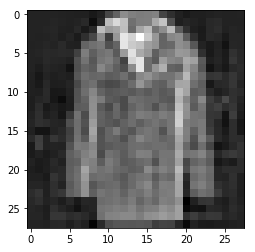

0.15000000000000002   0.1615808278448531   0.08338892108946601
DELTA=0.15000000000000002


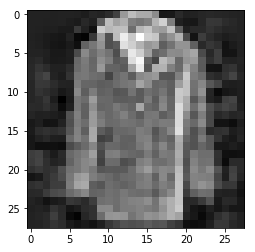

0.2   0.22841908079058773   0.10651591111520588
DELTA=0.2


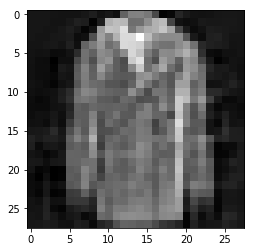

0.25   0.2360769300970546   0.11635601600511107
DELTA=0.25


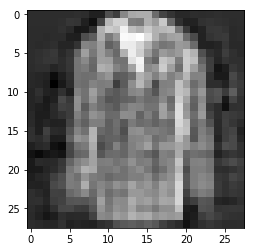

0.3   0.3639191560515742   0.13020507212246055
DELTA=0.3


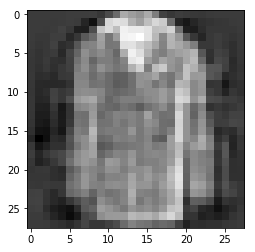

0.35   0.33934185145333673   0.1437598056295838
DELTA=0.35


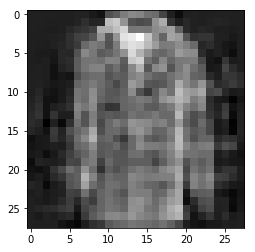

0.39999999999999997   0.47918347137426465   0.17582513964016333
DELTA=0.39999999999999997


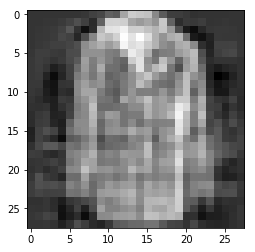

0.44999999999999996   0.49220777286450307   0.17219118249003557
DELTA=0.44999999999999996


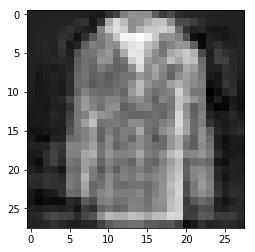

0.49999999999999994   0.5666363981917025   0.17095231860677879
DELTA=0.49999999999999994


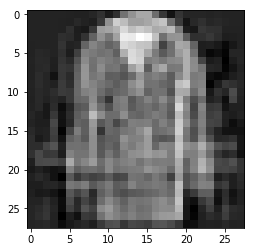

0.5499999999999999   0.7608458057024451   0.20335383872314194
DELTA=0.5499999999999999


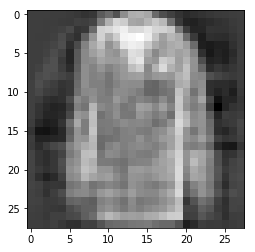

0.6   0.7851513588901441   0.18812388978410258
DELTA=0.6


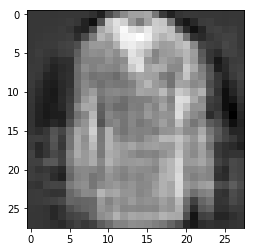

0.65   0.7010253349221222   0.2021425458943303
DELTA=0.65


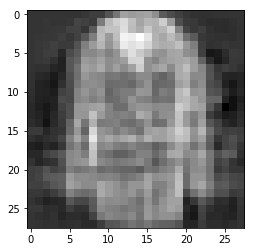

0.7000000000000001   0.8927551200135055   0.22586557829481516
DELTA=0.7000000000000001


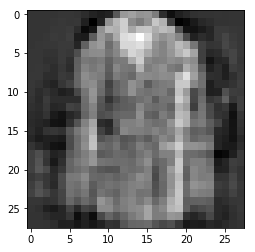

0.7500000000000001   1.6409210100711324   0.231294628854786
DELTA=0.7500000000000001


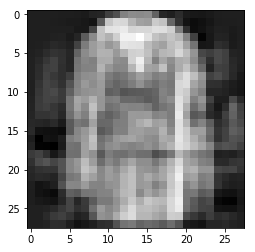

0.8000000000000002   1.0844183034815438   0.22947233341604203
DELTA=0.8000000000000002


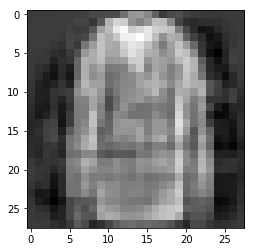

0.8500000000000002   1.8569892822707676   0.22765566926795877
DELTA=0.8500000000000002


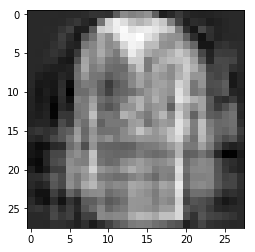

0.9000000000000002   1.2219661627332286   0.22315786581475894
DELTA=0.9000000000000002


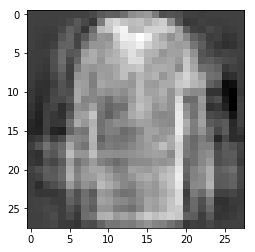

0.9500000000000003   1.4985644554794728   0.2507739741001124
DELTA=0.9500000000000003


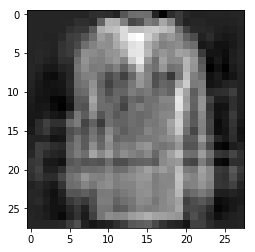

1.0000000000000002   1.5458219467131118   0.22938171923498699
DELTA=1.0000000000000002


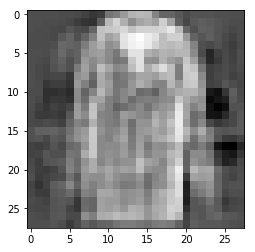

1.0500000000000003   1.4749437171463047   0.2465202759288255
DELTA=1.0500000000000003


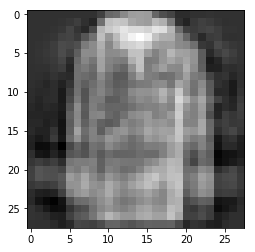

1.1000000000000003   1.911274894867907   0.2644489876286365
DELTA=1.1000000000000003


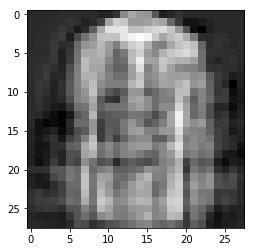

1.1500000000000004   1.3528240160957596   0.3026009085154682
DELTA=1.1500000000000004


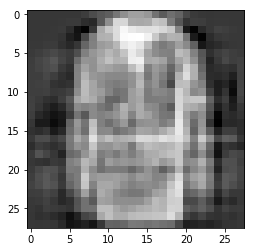

1.2000000000000004   1.9630191523567715   0.24307869321691367
DELTA=1.2000000000000004


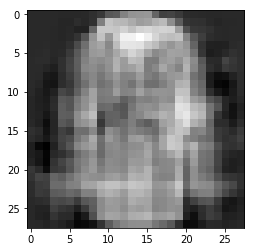

1.2500000000000004   1.8991426492428616   0.27985122047377675
DELTA=1.2500000000000004


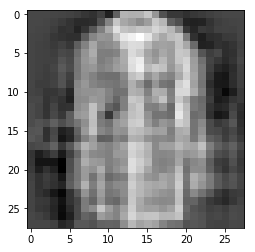

1.3000000000000005   1.504505983118643   0.30774670558040274
DELTA=1.3000000000000005


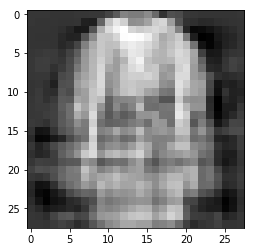

1.3500000000000005   1.6538901274305726   0.3059207640676871
DELTA=1.3500000000000005


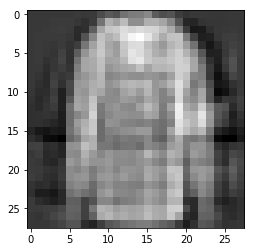

1.4000000000000006   1.5534599752815674   0.27803456566744505
DELTA=1.4000000000000006


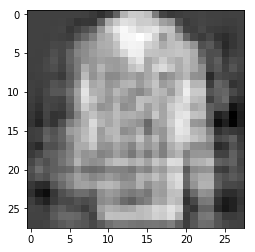

1.4500000000000006   1.7181030063290466   0.29230568899705905
DELTA=1.4500000000000006


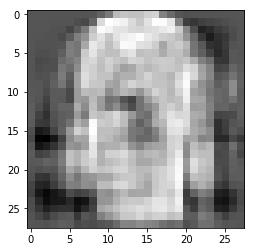

1.5000000000000007   1.9694915586233146   0.36419524654581437
DELTA=1.5000000000000007


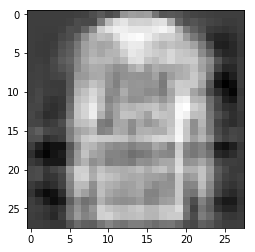

1.5500000000000007   1.9129014164732885   0.3183293184881185
DELTA=1.5500000000000007


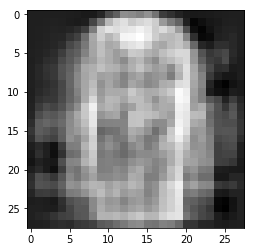

1.6000000000000008   1.522668159008933   0.2931324527581049
DELTA=1.6000000000000008


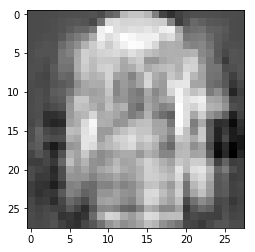

1.6500000000000008   1.979364843387989   0.3806468992225135
DELTA=1.6500000000000008


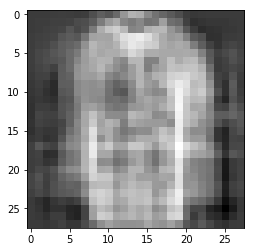

1.7000000000000008   1.7883665584945616   0.3650250502175092
DELTA=1.7000000000000008


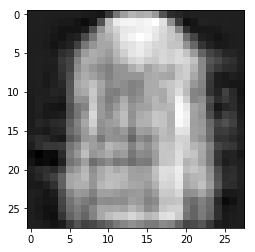

1.7500000000000009   1.683407982843695   0.3016872336213608
DELTA=1.7500000000000009


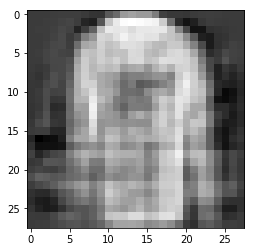

1.800000000000001   1.9740360051881642   0.3299155880571947
DELTA=1.800000000000001


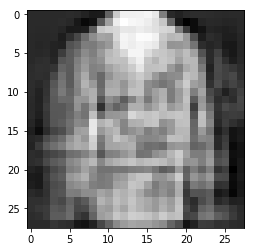

1.850000000000001   1.982800550690609   0.33742097063684695
DELTA=1.850000000000001


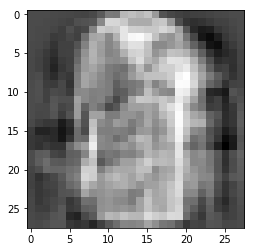

1.900000000000001   1.9751708727053507   0.3011445354790678
DELTA=1.900000000000001


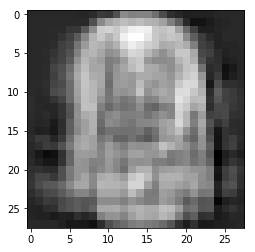

1.950000000000001   1.6860771127433942   0.31839933621324534
DELTA=1.950000000000001


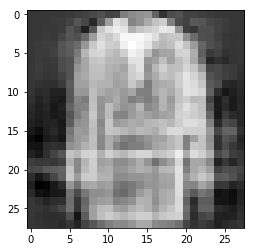

2.000000000000001   1.7432544007208577   0.2938676021941916
DELTA=2.000000000000001


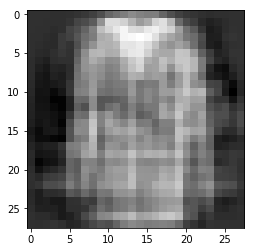

2.0500000000000007   1.913648519097397   0.28281627196560843
DELTA=2.0500000000000007


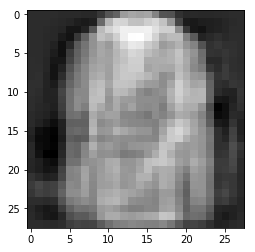

2.1000000000000005   1.7085167392769978   0.3462055749516478
DELTA=2.1000000000000005


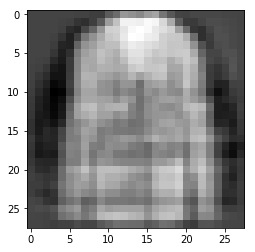

2.1500000000000004   1.9517614014592557   0.3933064536920018
DELTA=2.1500000000000004


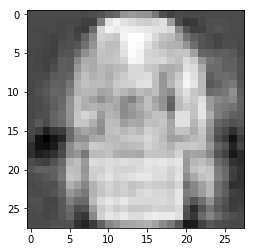

2.2   1.803884767946825   0.3419355384944268
DELTA=2.2


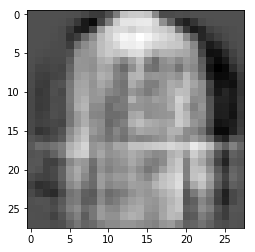

2.25   1.8461061205354607   0.3954705354671171
DELTA=2.25


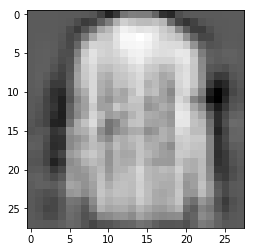

2.3   1.493673421369918   0.3667545621476785
DELTA=2.3


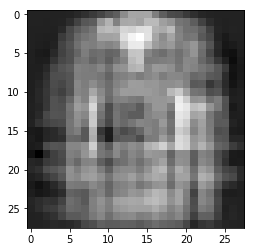

2.3499999999999996   1.9389955599909774   0.422609908209031
DELTA=2.3499999999999996


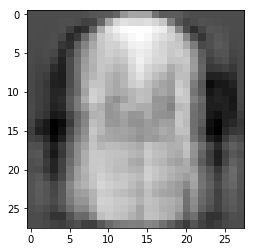

2.3999999999999995   1.5777937541849618   0.4272988345250596
DELTA=2.3999999999999995


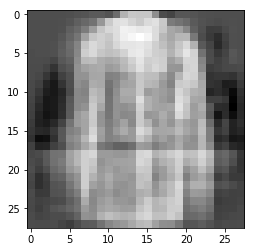

2.4499999999999993   1.8961331444623906   0.31020144021064144
DELTA=2.4499999999999993


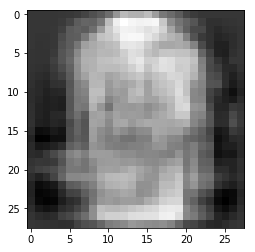

2.499999999999999   1.7680386741862246   0.3803821072336352


In [8]:
MSEs = np.zeros((50,2))
deltas = np.zeros((50,1))
DELTA=0
d_DELTA=0.05
path = 'Figures/'
for i in range(50):
    print(f'DELTA={DELTA}')
    error_stpr = np.zeros((2))
    error_pca = np.zeros((2))
    #create noise
    b = np.random.randn(N,N)
    W = np.tril(b) + np.tril(b, -1).T
    DELTA=DELTA+d_DELTA
    Y = x@x.T/(N) + np.sqrt(DELTA)*W/np.sqrt(N)
    
    deltas[i]=DELTA
    # PCA
    val, vec = eigsh(Y, k=1,which='LA')
    error_pca[0]=sum((x/np.sqrt(N) - vec)**2)
    error_pca[1]=sum((x/np.sqrt(N) + vec)**2)
    argm_pca = np.argmin(error_pca)
    MSEs[i,0]=error_pca[argm_pca]
    v_pca = (argm_pca * 2 -1 ) * vec
    plt.imshow((v_pca.real).reshape(28,28),cmap='Greys')
    
    # LAMP
    val, vec = eigs(SIGMA@(Y-np.eye(784,784)), k=1,which='LR')
    error_stpr[0]=sum((x/np.sqrt(N) - vec.real)**2)
    error_stpr[1]=sum((x/np.sqrt(N) + vec.real)**2)
    argm = np.argmin(error_stpr)
    MSEs[i,1]=error_stpr[argm]
    v_stpr = (argm * 2 -1 ) * vec
        
    plt.imshow((v_stpr.real).reshape(28,28),cmap='Greys')
    plt.show()

    print(DELTA," ",MSEs[i,0]," ",MSEs[i,1])

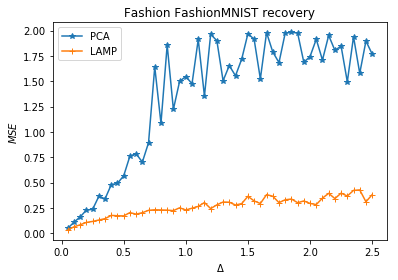

In [10]:
plt.figure()
plt.title("Fashion FashionMNIST recovery")
plt.plot(deltas,MSEs[:,0],'*-', label='PCA')
plt.plot(deltas,MSEs[:,1],'+-', label='LAMP')
plt.xlabel("$\Delta$")
plt.ylabel("$MSE$")
plt.legend()